<a href="https://colab.research.google.com/github/saifulrijal-ds/data-fellowship/blob/master/PracticeCase_Statistics_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
# shape of dataframe
df.shape

(1338, 7)

1. It has 1338 rows and 7 columns

In [0]:
# dataframe info, to get data type each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age is numerical-discrete or in Python is integer  
sex is categorical-nominal or in Python is text  
bmi is numerical-cotinuous or in Python is float  
children is numerical-discrete or in Python is integer  
smoker is categorical-nominal or in Python is text  
region is categorical-nominal or in Python is text  
cahrges is numerical-continuous or in Python is float

In [0]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no missing value

In [0]:
# descriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Age')]

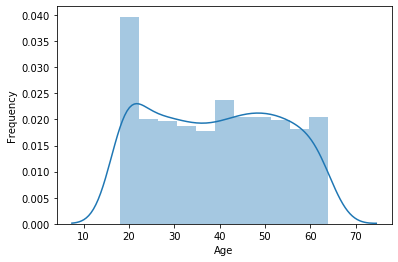

In [0]:
# age
ageax = sns.distplot(df['age'])
ageax.set(xlabel='Age', ylabel='Frequency')

[Text(0, 0.5, 'Frequecy'), Text(0.5, 0, 'BMI')]

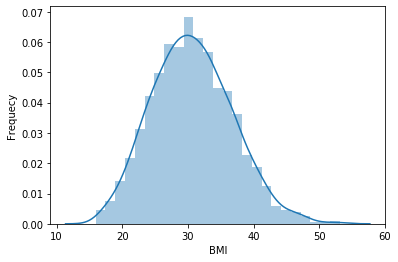

In [0]:
# bmi
bmiax = sns.distplot(df['bmi'])
bmiax.set(xlabel='BMI', ylabel='Frequecy')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Charges')]

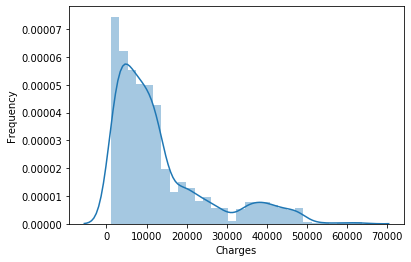

In [0]:
# charges
chargesax = sns.distplot(df['charges'])
chargesax.set(xlabel='Charges', ylabel='Frequency')

In [0]:
from scipy import stats

In [0]:
skew_age = stats.skew(df['age'])
skew_bmi = stats.skew(df['bmi'])
skew_charges = stats.skew(df['charges'])
print("skewness values for 'age' column is {}, 'bmi' column is {}, and 'charges' column is {}, statistically speaking."
     .format(skew_age, skew_bmi, skew_charges))

skewness values for 'age' column is 0.055610083072599126, 'bmi' column is 0.28372857291709386, and 'charges' column is 1.5141797118745743, statistically speaking.


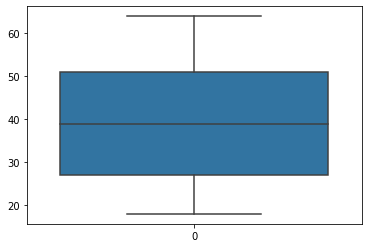

In [0]:
# one way to find outliers is to use a boxplot.
# age

sns.boxplot(data=df['age'])

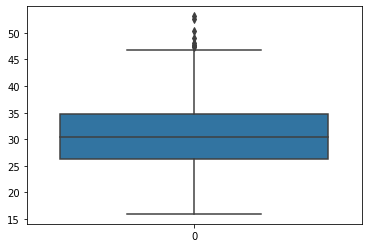

In [0]:
# bmi
sns.boxplot(data=df['bmi'])

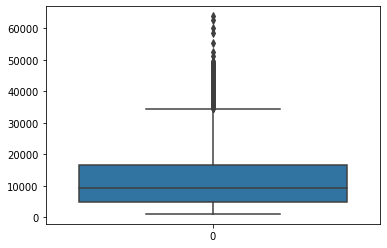

In [0]:
# charges
sns.boxplot(data=df['charges'])

#### Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [0]:
# cara sederhana
# smoker_charges = df[df['smoker'] == 'yes']['charges']
# nosmoker_charges = df[df['smoker'] == 'no']['charges']
# stats.ttest_ind(smoker_charges, nosmoker_charges)

In [0]:
# clean outliers

charges = df['charges']
Q1 = charges.quantile(0.25)
Q3 = charges.quantile(0.75)
IQR = Q3 - Q1
IQR

11899.625365

In [0]:
new_df = df[~((charges < (Q1 - 1.5 * IQR)) | (charges > (Q1 + 1.5 * IQR)))]

new_df.shape

(1108, 7)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Charges')]

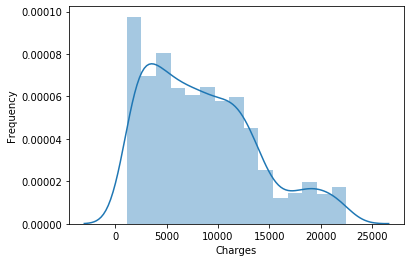

In [0]:
ax = sns.distplot(new_df['charges'])
ax.set(xlabel='Charges', ylabel='Frequency')

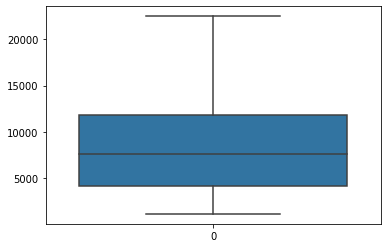

In [0]:
sns.boxplot(data=new_df['charges'])

In [0]:
smoker_charges = new_df[new_df['smoker'] == 'yes']['charges']
nosmoker_charges = new_df[new_df['smoker'] == 'no']['charges']
stats.ttest_ind(smoker_charges, nosmoker_charges)

Ttest_indResult(statistic=22.82078135878701, pvalue=9.05786722574236e-95)